In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Imports & Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)


# 2. Load Dataset (PDF Task 1)

In [ ]:
df = pd.read_csv("/content/ODF_Fire_Occurrence_Data_2000-2022.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (23490, 38)


,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,Protected_Acres,HumanOrLightning,CauseBy,GeneralCause,SpecificCause,Cause_Comments,Lat_DD,Long_DD,LatLongDD,FO_LandOwnType,Twn,Rng,Sec,Subdiv,LandmarkLocation,County,RegUseZone,RegUseRestriction,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
0,108204,STAT,2017,EOA,Klamath-Lake,Lakeview,17-982068-18,Castle 483,A,NaN,0.1,Under Invest,NaN,Under Invest,NaN,NaN,42.04167,-120.75500,POINT (-120.755 42.04167),Other Private,41S,17E,6.0,NaN,3 mi SW of dog Lake,Lake,NaN,NaN,NaN,NaN,8/8/2017 12:53,NaN,NaN,8/8/2017 0:00,8/8/2017 14:11,98,982,068
1,68272,STAT,2003,NOA,North Cascade,Santiam,03-582216-04,Marion Forks Move Up,A,0.0,0.0,Human,Recreationist,Smoking,Discarded Cigarette/Tobacco,MOVE UP FOR B&B FIRE,NaN,NaN,NaN,USFS,NaN,NaN,NaN,NaN,13 miles Se of Detroit,Linn,LN1,Reg Use Closure,Unspecified,NaN,9/2/2003 0:00,NaN,NaN,9/3/2003 13:43,8/23/2011 16:20,58,582,216
2,75461,STAT,2006,EOA,Klamath-Lake,Klamath,06-981055-07,BUCK,A,0.1,0.1,Lightning,Lightning,Lightning,Lightning,NaN,42.16333,-122.11833,POINT (-122.11833 42.16333),Industrial,39S,06E,21.0,NWSE,BUCK MT.,Klamath,KF1,Reg Use Closure,Lvl 4 Complete Shutdown,8/5/2006 15:00,8/5/2006 15:45,8/5/2006 15:42,8/5/2006 18:00,8/8/2006 19:43,9/16/2006 16:31,98,981,055
3,98874,STAT,2014,NOA,Forest Grove,Columbia City,14-532076-15,Hafferman Rd. #1,A,0.1,0.1,Human,Ruralist-Paying,Debris Burning,NaN,NaN,45.82833,-122.98944,POINT (-122.98944 45.82833),Rural Residential,4N,2W,13.0,NaN,NaN,Columbia,NW3,Closed Fire Season Lvl 1,Lvl 2 Limited Shutdown,NaN,9/4/2014 14:20,NaN,9/4/2014 14:40,9/4/2014 0:00,9/5/2014 11:28,53,532,076
4,112552,STAT,2017,NOA,North Cascade,Santiam,17-582069-18,Lyons Preposition,A,NaN,0.0,Human,NaN,Miscellaneous,NaN,NaN,NaN,NaN,NaN,ERROR: #N/A,NaN,NaN,NaN,NaN,North Cascade Santiam Office,ERROR: #N/A,NaN,NaN,NaN,NaN,9/12/2017 8:00,NaN,NaN,8/29/2018 0:00,8/29/2018 12:44,58,582,069


# **Dataset Shape & Info**

In [ ]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Serial                  23490 non-null  int64  
 1   FireCategory            23490 non-null  object 
 2   FireYear                23490 non-null  int64  
 3   Area                    23490 non-null  object 
 4   DistrictName            23490 non-null  object 
 5   UnitName                23490 non-null  object 
 6   FullFireNumber          23490 non-null  object 
 7   FireName                23490 non-null  object 
 8   Size_class              23490 non-null  object 
 9   EstTotalAcres           23411 non-null  float64
 10  Protected_Acres         23490 non-null  float64
 11  HumanOrLightning        23490 non-null  object 
 12  CauseBy                 23362 non-null  object 
 13  GeneralCause            23490 non-null  object 
 14  SpecificCause           23266 non-null

,Serial,FireCategory,FireYear,Area,DistrictName,UnitName,FullFireNumber,FireName,Size_class,EstTotalAcres,Protected_Acres,HumanOrLightning,CauseBy,GeneralCause,SpecificCause,Cause_Comments,Lat_DD,Long_DD,LatLongDD,FO_LandOwnType,Twn,Rng,Sec,Subdiv,LandmarkLocation,County,RegUseZone,RegUseRestriction,Industrial_Restriction,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber
count,23490.000000,23490,23490.00000,23490,23490,23490,23490,23490,23490,23411.000000,23490.000000,23490,23362,23490,23266,9805,23480.000000,23480.000000,23480,23490,23478,23475,23478.000000,23459,22208,23490,23440,23401,23401,23396,23490,23396,23395,23487,23490,23490.000000,23490.000000,23490
unique,NaN,1,NaN,3,14,31,23335,19637,7,NaN,NaN,3,16,10,117,6876,NaN,NaN,23116,15,100,108,NaN,23,17126,37,144,6,7,20257,22822,22504,22304,11005,22865,NaN,NaN,1009
top,NaN,STAT,NaN,SOA,Southwest Oregon,Grants Pass,01-952065-02,Mill Creek,A,NaN,NaN,Human,Lightning,Lightning,Lightning,Lightning,NaN,NaN,POINT (-124.19892 43.65641),Rural Residential,36S,06W,NaN,SWNE,Roseburg,Jackson,SW3,Reg Use Closure,Does Not Apply - Eastern OR,7/15/2018 9:00,8/17/2022 17:00,8/17/2022 17:00,12/31/2013 12:00,8/19/2008 0:00,10/26/2001 10:20,NaN,NaN,018
freq,NaN,23490,NaN,12125,5975,3072,2,33,17013,NaN,NaN,17197,6250,6266,6247,381,NaN,NaN,9,5791,1272,973,NaN,1615,101,3338,3011,14671,6562,92,18,19,20,67,12,NaN,NaN,257
mean,90425.933461,NaN,2010.80132,NaN,NaN,NaN,NaN,NaN,NaN,270.802503,63.454008,NaN,NaN,NaN,NaN,NaN,43.718410,-122.258736,NaN,NaN,NaN,NaN,18.576753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.754662,779.371052,NaN
std,20901.016028,NaN,6.73508,NaN,NaN,NaN,NaN,NaN,NaN,6816.736966,1973.577812,NaN,NaN,NaN,NaN,NaN,1.226385,1.707589,NaN,NaN,NaN,NaN,10.439507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.618857,146.534574,NaN
min,57485.000000,NaN,2000.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,41.089460,-124.983610,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,511.000000,NaN
25%,72508.500000,NaN,2005.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.010000,0.010000,NaN,NaN,NaN,NaN,NaN,42.526093,-123.387420,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,711.000000,NaN
50%,88340.000000,NaN,2011.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,0.100000,NaN,NaN,NaN,NaN,NaN,43.581805,-122.847220,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,732.000000,NaN
75%,107432.500000,NaN,2017.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.350000,NaN,NaN,NaN,NaN,NaN,44.789518,-121.541827,NaN,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,954.000000,NaN


# 3. Target & Feature Selection (PDF Task 2)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

TARGET = "Size_class"

features = [
    "EstTotalAcres",
    "Lat_DD",
    "Long_DD",
    "FireYear"
]

df = df[features + [TARGET]].dropna()


# 4. Missing Value Handling

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

# Fill numeric with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


# 5. Encode Target Variable

In [ ]:
le = LabelEncoder()
df[TARGET] = le.fit_transform(df[TARGET])


# 6. Exploratory Data Analysis

Class Distribution

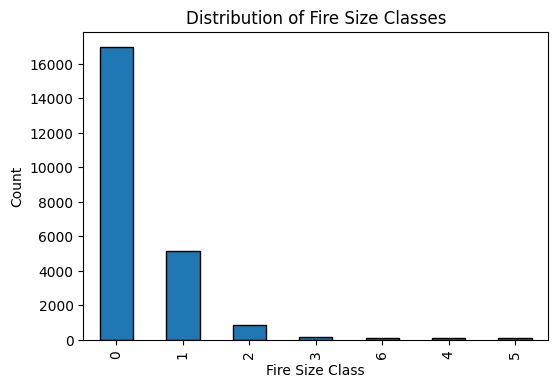

In [ ]:
plt.figure(figsize=(6,4))
y.value_counts().plot(kind="bar", edgecolor="black")
plt.title("Distribution of Fire Size Classes")
plt.xlabel("Fire Size Class")
plt.ylabel("Count")
plt.show()


# **Box Plot**

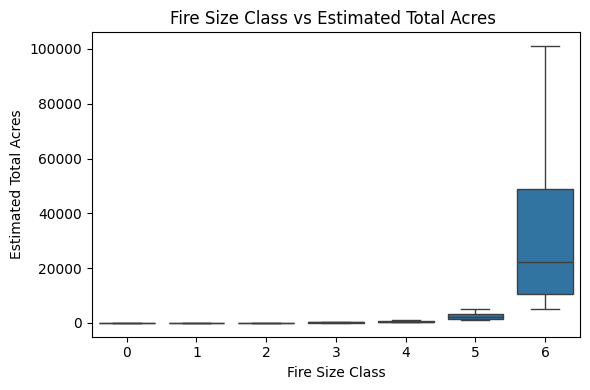

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x=df[TARGET],
    y=df['EstTotalAcres'],
    showfliers=False
)
plt.title("Fire Size Class vs Estimated Total Acres ")
plt.xlabel("Fire Size Class")
plt.ylabel("Estimated Total Acres")
plt.tight_layout()
plt.show()


# Correlation Heatmap

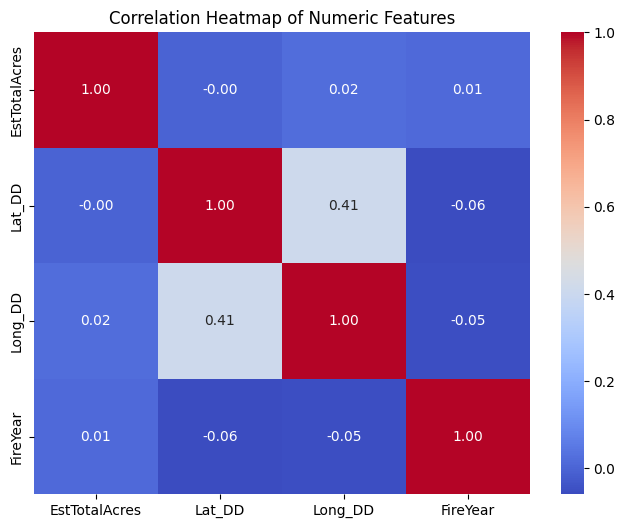

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


# 7. Train–Test Split & Scaling

In [ ]:
X = df.drop(TARGET, axis=1)
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 8. Neural Network Classifier

In [ ]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("Neural Network Results")
print(classification_report(y_test, y_pred_mlp))


Neural Network Results
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      3390
           1       0.67      0.06      0.11      1023
           2       1.00      0.79      0.89       170
           3       0.90      0.97      0.94        38
           4       0.94      0.81      0.87        21
           5       0.89      1.00      0.94        16
           6       1.00      1.00      1.00        24

    accuracy                           0.79      4682
   macro avg       0.88      0.81      0.80      4682
weighted avg       0.77      0.79      0.71      4682



# 9. Baseline Models

Classical Model 1 – Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)


Classical Model 2 – Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


# 10. Evaluation Function

In [ ]:
def classification_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted')
    }


# 11. Initial Model Comparison

In [ ]:
initial_results = pd.DataFrame(
    [
        classification_metrics(y_test, y_pred_lr),
        classification_metrics(y_test, y_pred_dt)
    ],
    index=['Logistic Regression', 'Decision Tree']
)

initial_results


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.73003,0.536967,0.73003,0.617452
Decision Tree,1.00000,1.000000,1.00000,1.000000



# Logistic Regression GridSearch

🔹 TASK 5 — Hyperparameter Optimization
---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Grid Search
grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_lr.fit(X_train_scaled, y_train)

# Best Logistic Regression model
best_log_reg = grid_lr.best_estimator_

print("Best Logistic Regression Parameters:", grid_lr.best_params_)


Best Logistic Regression Parameters: {'C': 10, 'solver': 'lbfgs'}


In [ ]:
print("Best Parameters:", grid_lr.best_params_)
print("Best CV F1-score:", grid_lr.best_score_)

Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Best CV F1-score: 0.7317633833899906


In [ ]:
print("Best Cross-Validation Accuracy:", grid_lr.best_score_)

Best Cross-Validation Accuracy: 0.7317633833899906


# Decision Tree GridSearch

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_

print("Best Decision Tree Parameters:", grid_dt.best_params_)


Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_split': 2}


In [ ]:
print("Best Parameters:", grid_dt.best_params_)
print("Best CV F1-score:", grid_dt.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Best CV F1-score: 0.9997863818424566


In [ ]:
print("Best Cross-Validation Accuracy:", grid_dt.best_score_)

Best Cross-Validation Accuracy: 0.9997863818424566


# 13. Feature Selection

In [ ]:
importances = grid_dt.best_estimator_.feature_importances_
indices = np.argsort(importances)[-8:]

selected_features = X.columns[indices]
selected_features


Index(['Lat_DD', 'Long_DD', 'FireYear', 'EstTotalAcres'], dtype='object')

# 14. Reduced Dataset

In [ ]:
X_selected = X[selected_features]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_selected, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler_final = StandardScaler()
X_train_s_scaled = scaler_final.fit_transform(X_train_s)
X_test_s_scaled = scaler_final.transform(X_test_s)


# 15. Final Models & Comparison (PDF Task 7)

Final Logistic Regression

In [ ]:
final_lr = grid_lr.best_estimator_
final_lr.fit(X_train_s_scaled, y_train_s)

lr_final_metrics = classification_metrics(
    y_test_s,
    final_lr.predict(X_test_s_scaled)
)


Final Decision Tree

In [ ]:
final_dt = grid_dt.best_estimator_
final_dt.fit(X_train_s, y_train_s)

dt_final_metrics = classification_metrics(
    y_test_s,
    final_dt.predict(X_test_s)
)


# 16. Final Comparison Table

In [ ]:
final_results = pd.DataFrame(
    [lr_final_metrics, dt_final_metrics],
    index=["Logistic Regression (Final)", "Decision Tree (Final)"]
)

final_results


,Accuracy,Precision,Recall,F1-Score
Logistic Regression (Final),0.732379,0.542414,0.732379,0.622003
Decision Tree (Final),1.000000,1.000000,1.000000,1.000000
